In [1]:
using Luxor

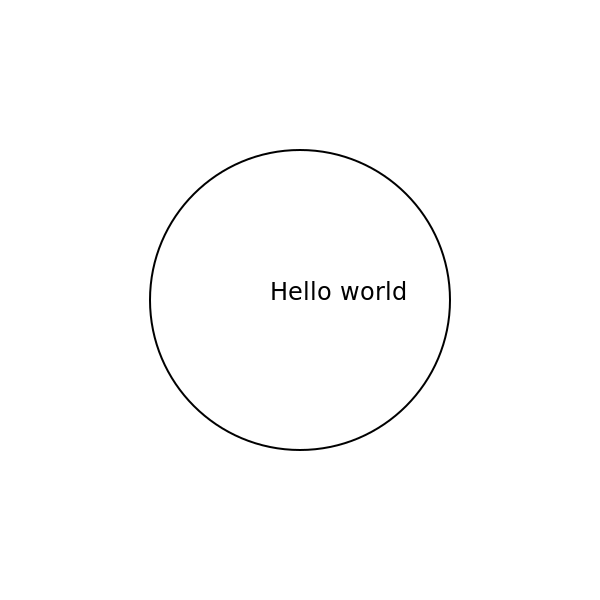

In [25]:
@png begin
    fontsize(24)
    text("Hello world", Point(-30,0))
    circle(Point(0,0), 150, :stroke)
end

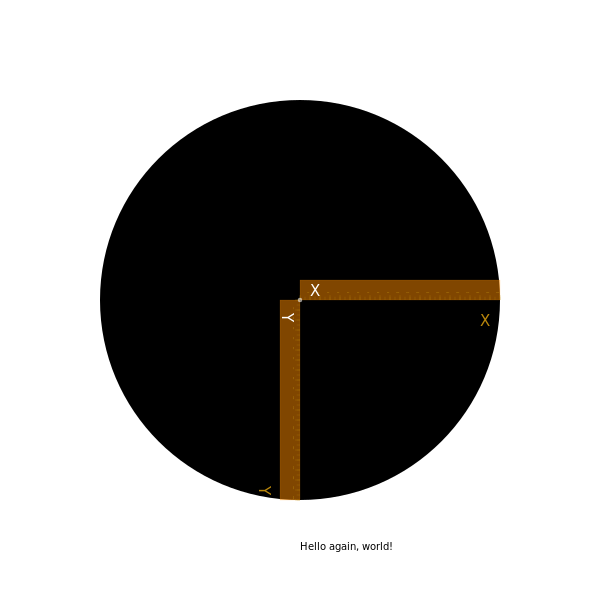

In [6]:
@png begin
    text("Hello again, world!", Point(0, 250))
    circle(Point(0, 0), 200, :fill)
    rulers()
end

In [7]:
function egg(radius, action=:none)
    A, B = [Point(x, 0) for x in [-radius, radius]]
    nints, C, D =
        intersectionlinecircle(Point(0, -2radius), Point(0, 2radius), A, 2radius)

    flag, C1 = intersectionlinecircle(C, D, O, radius)
    nints, I3, I4 = intersectionlinecircle(A, C1, A, 2radius)
    nints, I1, I2 = intersectionlinecircle(B, C1, B, 2radius)

    if distance(C1, I1) < distance(C1, I2)
        ip1 = I1
    else
        ip1 = I2
    end
    if distance(C1, I3) < distance(C1, I4)
        ip2 = I3
    else
        ip2 = I4
    end

    newpath()
    arc2r(B, A, ip1, :path)
    arc2r(C1, ip1, ip2, :path)
    arc2r(A, ip2, B, :path)
    arc2r(O, B, A, :path)
    closepath()

    do_action(action)
end

egg (generic function with 2 methods)

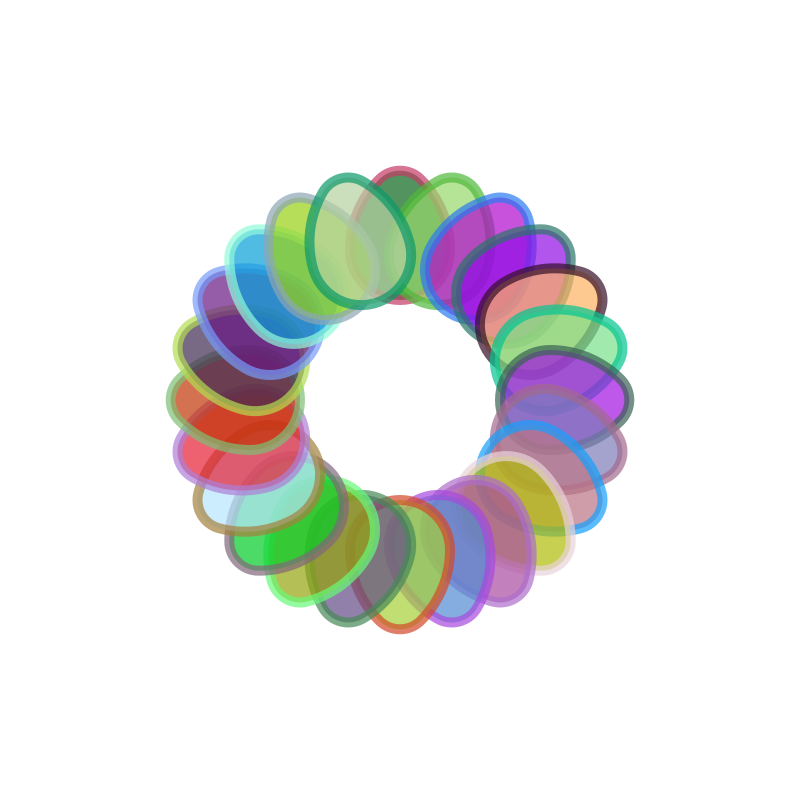

In [43]:
@png begin
    setopacity(0.7)
    for theta in range(0, step=pi/12, length=24)
        @layer begin
            rotate(theta)
            translate(0, -150)
            egg(50, :path)
            setline(10)
            randomhue()
            fillpreserve()

            randomhue()
            strokepath()
        end
    end
end 800 800 "/tmp/eggstravaganza.png"


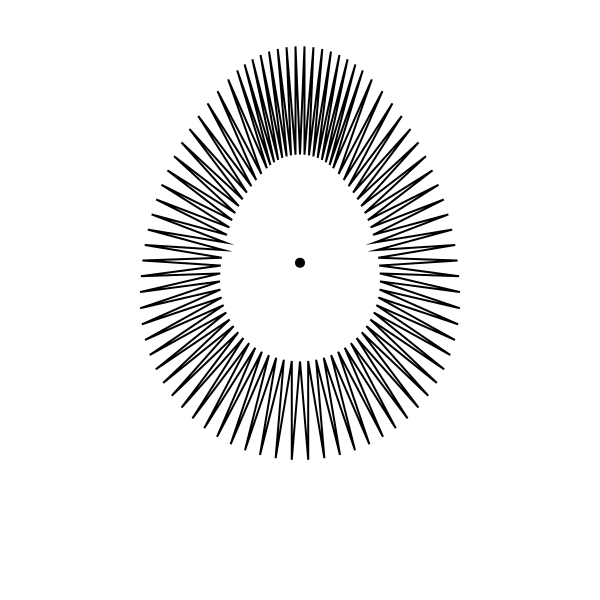

In [10]:
@png begin
    egg(160, :path)
    pgon = first(pathtopoly())
    pc = polycentroid(pgon)
    circle(pc, 5, :fill)
    for pt in 1:2:length(pgon)
        pgon[pt] = between(pc, pgon[pt], 0.5)
    end
    poly(pgon, :stroke)
end

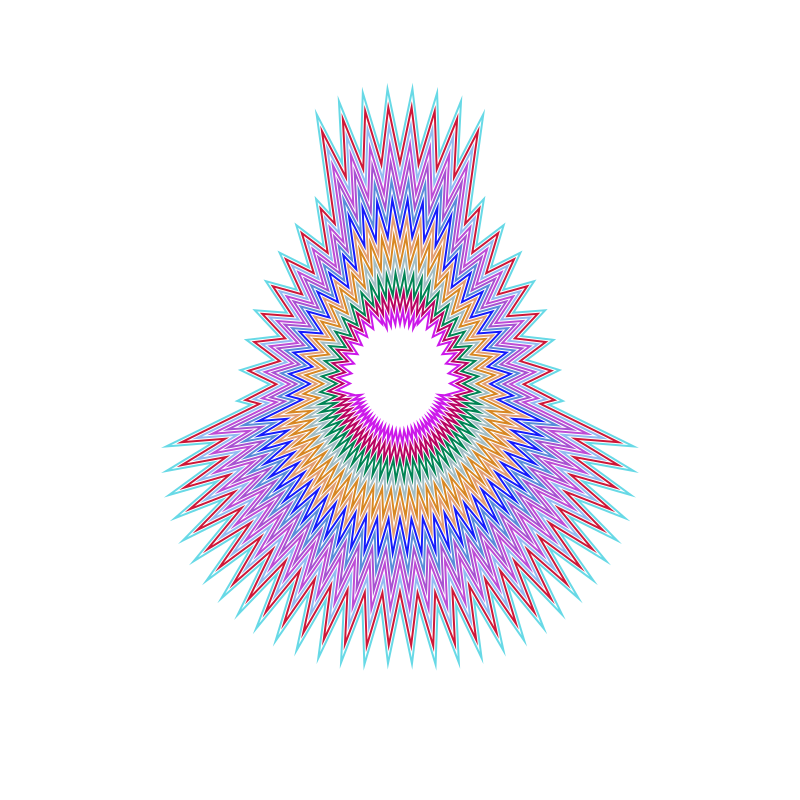

In [11]:
@png begin
    egg(80, :path)
    pgon = first(pathtopoly())
    pc = polycentroid(pgon)

    for pt in 1:2:length(pgon)
        pgon[pt] = between(pc, pgon[pt], 0.8)
    end

    for i in 30:-3:-8
        randomhue()
        op = offsetpoly(pgon, i)
        poly(op, :stroke, close=true)
    end
end 800 800 "/tmp/spike-egg.png"

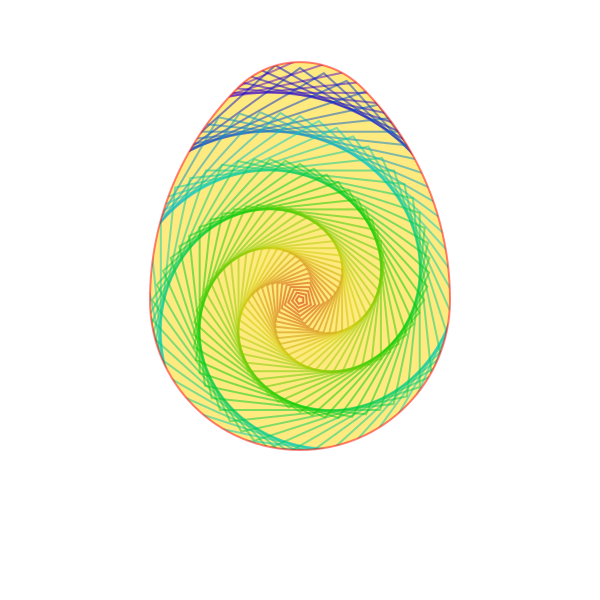

In [41]:
using Luxor, Colors
@svg begin
    setopacity(0.5)
    eg(a) = egg(150, a)
    sethue("gold")
    eg(:fill)
    eg(:clip)
    @layer begin
       for i in 360:-4:1
           sethue(Colors.HSV(i, 1.0, 0.8))
           rotate(pi/30)
           ngon(O, i, 5, 0, :stroke)
       end
    end
    clipreset()
    sethue("red")
    eg(:stroke)
end


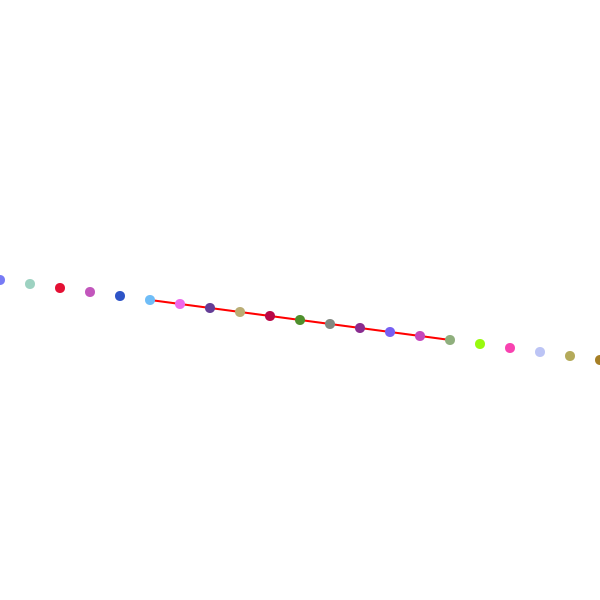

In [37]:
@svg begin
    sethue("red")
    p1 = Point(-150, 0)
    p2 = Point(150, 40)
    line(p1, p2)
    strokepath()
    for i in -0.5:0.1:1.5
        randomhue()
        circle(between(p1, p2, i), 5, :fill)
    end
end

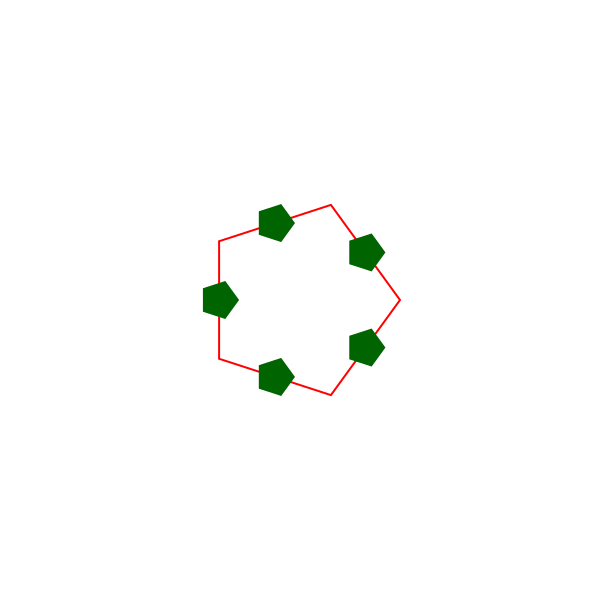

In [38]:
@svg begin
    sethue("red")
    ngon(O, 100, 5, 0, :stroke)

    sethue("darkgreen")
    p5 = ngon(O, 100, 5, 0, vertices=true)

    for i in eachindex(p5)
        pt1 = p5[mod1(i, 5)]
        pt2 = p5[mod1(i + 1, 5)]
        ngon(midpoint(pt1, pt2), 20, 5, 0, :fill)
    end
end